In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import datetime
%matplotlib inline

In [2]:
### BEGIN experimental cell
import utils
# years = [f'20{i}' for i in range(12,14)]
simpleCourtsOfInterest = pd.read_csv('generated/overall_courts_of_interest_simple.csv')
utils.analyzeFilingToFirstListForCourts(simpleCourtsOfInterest)

### END experimental cell

Processing year 2010
Processing year 2011
Processing year 2012
Processing year 2013
Processing year 2014
Processing year 2015
Processing year 2016
Processing year 2017
Processing year 2018


In [4]:
### BEGIN experimental cell
import utils
act_families = ['MV', 'NI', 'IPC']

for act_family in act_families:
    act_case_stats_by_year_court = pd.read_csv(f'generated/{act_family}_case_stats_by_year_court.csv')
    filtered_dist_courts = pd.read_csv('generated/filtered_courts.csv')
    # inner merge MV_case_stats_by_year_court and filtered_dist_courts on (state_code,dist_code,court_no)
    act_case_stats_by_year_court = act_case_stats_by_year_court.merge(filtered_dist_courts, how = 'inner', on = ['state_code','dist_code','court_no'])

    # get top and bottom 15 courts using court ranks each year
    best_courts, worst_courts = utils.getBestAndWorstCourts(act_case_stats_by_year_court, n = 15)
    print('Act family :', act_family)
    print('Best courts: ', best_courts)
    print('Worst courts: ', worst_courts)

### END experimental cell

Act family : MV
Best courts:  [(1, 1, 3), (1, 1, 7), (1, 2, 1), (1, 3, 2), (1, 3, 5), (1, 4, 1), (1, 5, 5), (1, 5, 1), (1, 7, 1), (1, 7, 6), (1, 8, 1), (1, 9, 1), (1, 4, 9), (1, 10, 1), (1, 13, 13)]
Worst courts:  [(14, 8, 1), (14, 13, 1), (14, 14, 1), (14, 15, 1), (14, 17, 1), (16, 2, 3), (16, 4, 2), (18, 15, 1), (6, 20, 8), (20, 2, 6), (20, 3, 9), (20, 5, 2), (22, 3, 1), (22, 16, 1), (24, 4, 2)]
Act family : NI
Best courts:  [(1, 3, 2), (1, 3, 5), (1, 4, 1), (1, 3, 20), (1, 7, 1), (1, 13, 13), (1, 9, 1), (1, 5, 5), (1, 17, 4), (1, 14, 1), (1, 13, 1), (1, 20, 7), (1, 20, 9), (1, 15, 2), (1, 15, 16)]
Worst courts:  [(26, 8, 1), (27, 1, 1), (29, 9, 1), (31, 1, 1), (31, 2, 1), (32, 1, 1), (14, 5, 1), (14, 7, 2), (14, 8, 1), (14, 13, 1), (14, 14, 1), (14, 17, 1), (22, 3, 1), (22, 16, 1), (24, 4, 2)]
Act family : IPC
Best courts:  [(1, 1, 3), (1, 1, 7), (1, 2, 1), (1, 3, 2), (1, 3, 5), (1, 3, 20), (1, 4, 1), (1, 4, 14), (1, 5, 1), (1, 5, 5), (1, 7, 1), (1, 7, 6), (1, 8, 1), (1, 9, 1), (1, 

In [12]:
### BEGIN experimental cell
# import utils

# case_stats_by_year_court = pd.read_csv(f'generated/dist_court_wise_pendency_rates_per_year.csv')
# filtered_dist_courts = pd.read_csv('generated/filtered_courts.csv')
# # inner merge MV_case_stats_by_year_court and filtered_dist_courts on (state_code,dist_code,court_no)
# case_stats_by_year_court = case_stats_by_year_court.merge(filtered_dist_courts, how = 'inner', on = ['state_code','dist_code','court_no'])

# # get top and bottom 15 courts using court ranks each year
# ranked_courts = utils.getRankedCourts(case_stats_by_year_court)
# with open('generated/all_ranked_dist_courts.csv', 'w') as f:
#     f.write(f'state-code,dist_code,court_no\n')
#     for court_tuple in ranked_courts:
#         f.write(f'{court_tuple[0]},{court_tuple[1]},{court_tuple[2]}\n')
# ranked_courts = pd.read_csv('generated/all_ranked_dist_courts.csv')
# filtered_dist_courts = pd.read_csv('generated/filtered_courts.csv')
# ranked_courts = ranked_courts.merge(filtered_dist_courts, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
# ranked_courts = ranked_courts.drop_duplicates(subset=['state_code', 'dist_code', 'court_no'])
# ranked_courts.to_csv('generated/all_ranked_dist_courts_.csv')

# dist_court_case_stats = pd.read_csv('generated/district_court_case_decision_stats.csv')
# ranked_courts = ranked_courts.merge(dist_court_case_stats.loc[:,['state_code','dist_code','court_no','median_decision_days']], how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
# ranked_courts.to_csv('generated/all_ranked_dist_courts_with_decision_stats.csv')
overall_ranked_courts = ranked_courts.sort_values(by = 'median_decision_days', ascending = True)
overall_ranked_courts.to_csv('generated/simple_all_ranked_dist_courts_with_decision_stats.csv')
### END experimental cell

In [9]:
### BEGIN experimental cell
courtsOfInterest = pd.read_csv('generated/overall_courts_of_interest_.csv')
simple_ranked_courts = pd.read_csv('generated/simple_all_ranked_dist_courts_with_decision_stats.csv')


num_states = 15
best_dist_courts = simple_ranked_courts.iloc[0:num_states, :]
worst_dist_courts = simple_ranked_courts.iloc[-num_states:, :]

dist_court_case_stats = pd.read_csv('generated/district_court_case_decision_stats.csv')
dist_court_case_stats = dist_court_case_stats.drop_duplicates(subset=['state_code', 'dist_code', 'court_no'])

best_courts_data = best_dist_courts.merge(dist_court_case_stats, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
best_courts_data = best_courts_data.sort_values(by = 'median_decision_days_x', ascending = True)
print(best_courts_data.head(n = 10))

worst_courts_data = worst_dist_courts.merge(dist_court_case_stats, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
worst_courts_data = worst_courts_data.sort_values(by = 'median_decision_days_x', ascending = True)
print(worst_courts_data.head(n = 10))

# print(len(dist_court_case_stats.index))
# dist_court_case_stats = dist_court_case_stats.sort_values(by = 'median_decision_days', ascending = True)

# dist_court_case_stats = dist_court_case_stats[dist_court_case_stats['median_decision_days'] > 0]
# best_dist_court_data = dist_court_case_stats.iloc[0:num_states, :]
# worst_dist_court_data = dist_court_case_stats.iloc[-num_states:, :]
# print(best_dist_court_data.head())
### END experimental cell

   Unnamed: 0_x  state_code  dist_code  court_no  state_name  \
0           984           6         24         4       Assam   
1           960           9          6        25   Rajasthan   
2           743          17         35         1     Gujarat   
3           345          10          9         5  Tamil Nadu   
4           334          10          7         7  Tamil Nadu   
5           941           9          7        48   Rajasthan   
6           744          17         36         1     Gujarat   
7           943           9         28        22   Rajasthan   
8           978           9         11        26   Rajasthan   
9           797          21          1         3   Meghalaya   

      district_name                              court_name  \
0          Udalguri  Additional District And Sessions Judge   
1           Bikaner               POCSO Bikaner District HQ   
2            Valsad                   valsad_district Court   
3       Thoothukudi        Principal Distri

In [ ]:
### BEGIN experimental cell
years = [f'20{i}' for i in range(11,19)]

# for each year, get caseData
    # merge caseData and interestCourts
    # save to interestCourtsCases_{year}.csv
courtsOfInterest = pd.read_csv('generated/overall_courts_of_interest_.csv')
acts_sections = pd.read_csv('acts_sections.csv')
acts_sections.drop(['bailable_ipc', 'number_sections_ipc', 'criminal'], axis = 1)
acts_sections = acts_sections[acts_sections['ddl_case_id'].notnull()]
acts_sections = acts_sections[acts_sections['act'].notnull()]
for year in years:
    print(f'Processing year : {year}')
    caseData = pd.read_csv(f'cases/_/cases_{year}.csv')
    caseData = caseData.merge(courtsOfInterest, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
    caseData = caseData.merge(acts_sections, how = 'inner', on = ['ddl_case_id'])
    caseData.to_csv(f'generated/dist_courts_of_interest_cases_act_section_{year}.csv')
### END experimental cell

C:\Users\91888\.julia\conda\3\envs\keras-gpu\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Processing year : 2011


30
30
30


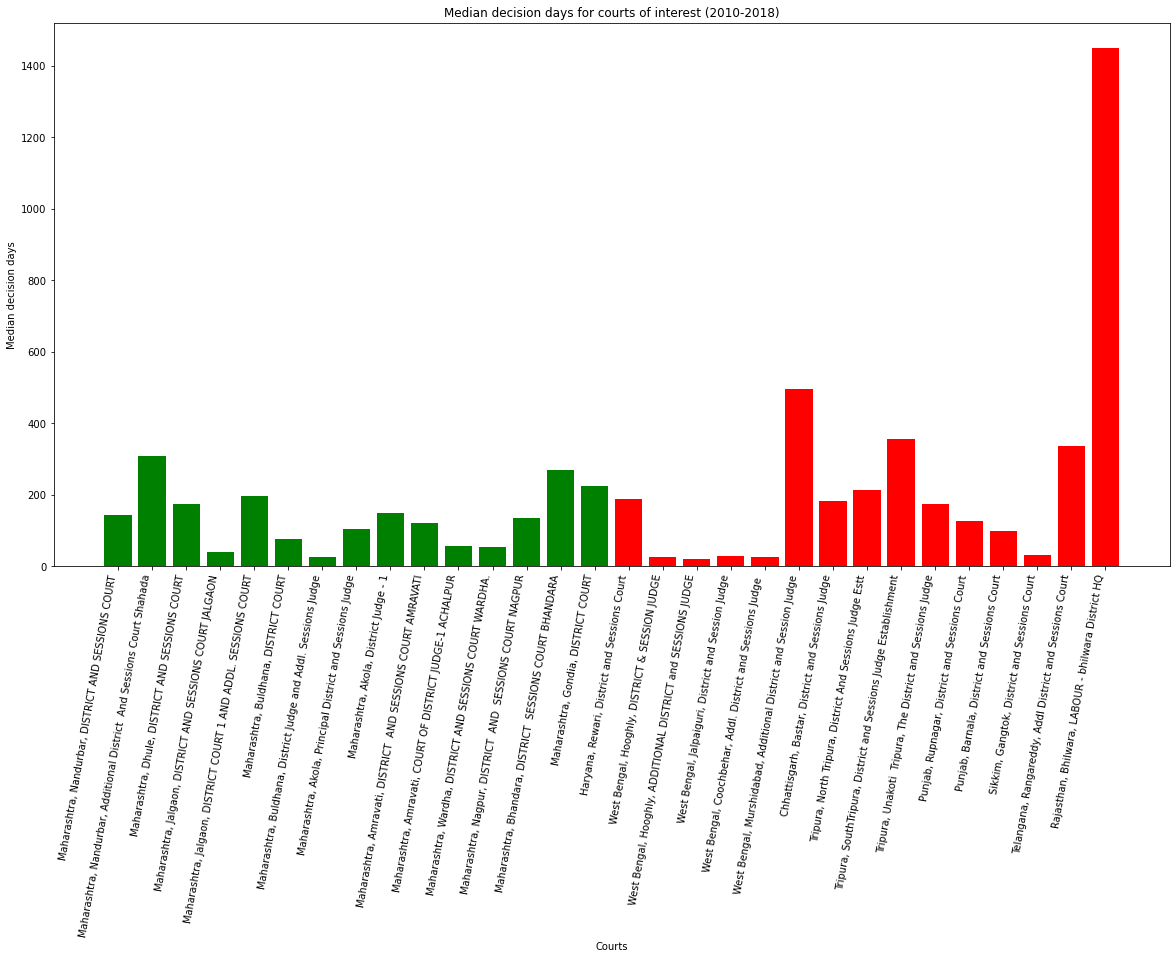

In [7]:
### BEGIN experimental cell

# courtsOfInterest = pd.read_csv('generated/overall_courts_of_interest_.csv')
# print(len(courtsOfInterest.index))
# dist_court_case_stats = pd.read_csv('generated/district_court_case_decision_stats.csv')
# # print(len(dist_court_case_stats.index))
# # # dist_court_judge_stats = pd.read_csv('generated/district_court_tenure_and_judge_stats.csv')
# # # dist_court_judge_stats = dist_court_judge_stats.drop_duplicates(subset=['state_code', 'dist_code', 'court_no'])
# # # print(len(dist_court_judge_stats.index))

# dist_court_data = courtsOfInterest.merge(dist_court_case_stats, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
# print(len(dist_court_data.index))
# # # dist_court_data = dist_court_data.merge(dist_court_judge_stats, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
# # # print(len(dist_court_data.index))
# dist_court_data = dist_court_data.drop_duplicates(subset=['state_code', 'dist_code', 'court_no'])
# print(len(dist_court_data.index))
# # dist_court_data.to_csv(f'generated/dist_courts_of_interest_consolidated_data.csv')
# dist_court_data = pd.read_csv(f'generated/dist_courts_of_interest_consolidated_data.csv')
dist_court_data.head()
num_states = 15
barColors = ['green'] * num_states
barColors.extend(['red'] * num_states)

# f, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 20))
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
x_labels = [f'{s}, {d}, {c}' for s,d,c in zip(dist_court_data['state_name'], dist_court_data['district_name'], dist_court_data['court_name'])]
plt.bar(x = x_labels, height = dist_court_data['median_decision_days'], color = barColors)
plt.title('Median decision days for courts of interest (2010-2018)')
plt.xticks( x_labels, rotation=80, ha='right')
plt.xlabel('Courts')
plt.ylabel('Median decision days')
f.savefig('generated/courts_of_interest_avg_rank_.png', bbox_inches="tight")
### END experimental cell

1044
15
15
     Unnamed: 0  state_code  dist_code  court_no  state_name  district_name  \
960         960           9          6        25   Rajasthan        Bikaner   
743         743          17         35         1     Gujarat         Valsad   
345         345          10          9         5  Tamil Nadu    Thoothukudi   
334         334          10          7         7  Tamil Nadu  Kanniyakumari   
941         941           9          7        48   Rajasthan     Ganganagar   

                                court_name  median_decision_days  
960              POCSO Bikaner District HQ                   2.0  
743                  valsad_district Court                   6.0  
345       Principal District court complex                   6.0  
334  Principal District and Sessions Court                   6.0  
941      POCSO -Sri Ganganagar District HQ                   6.0  
     Unnamed: 0  state_code  dist_code  court_no  state_name   district_name  \
302         302          10     

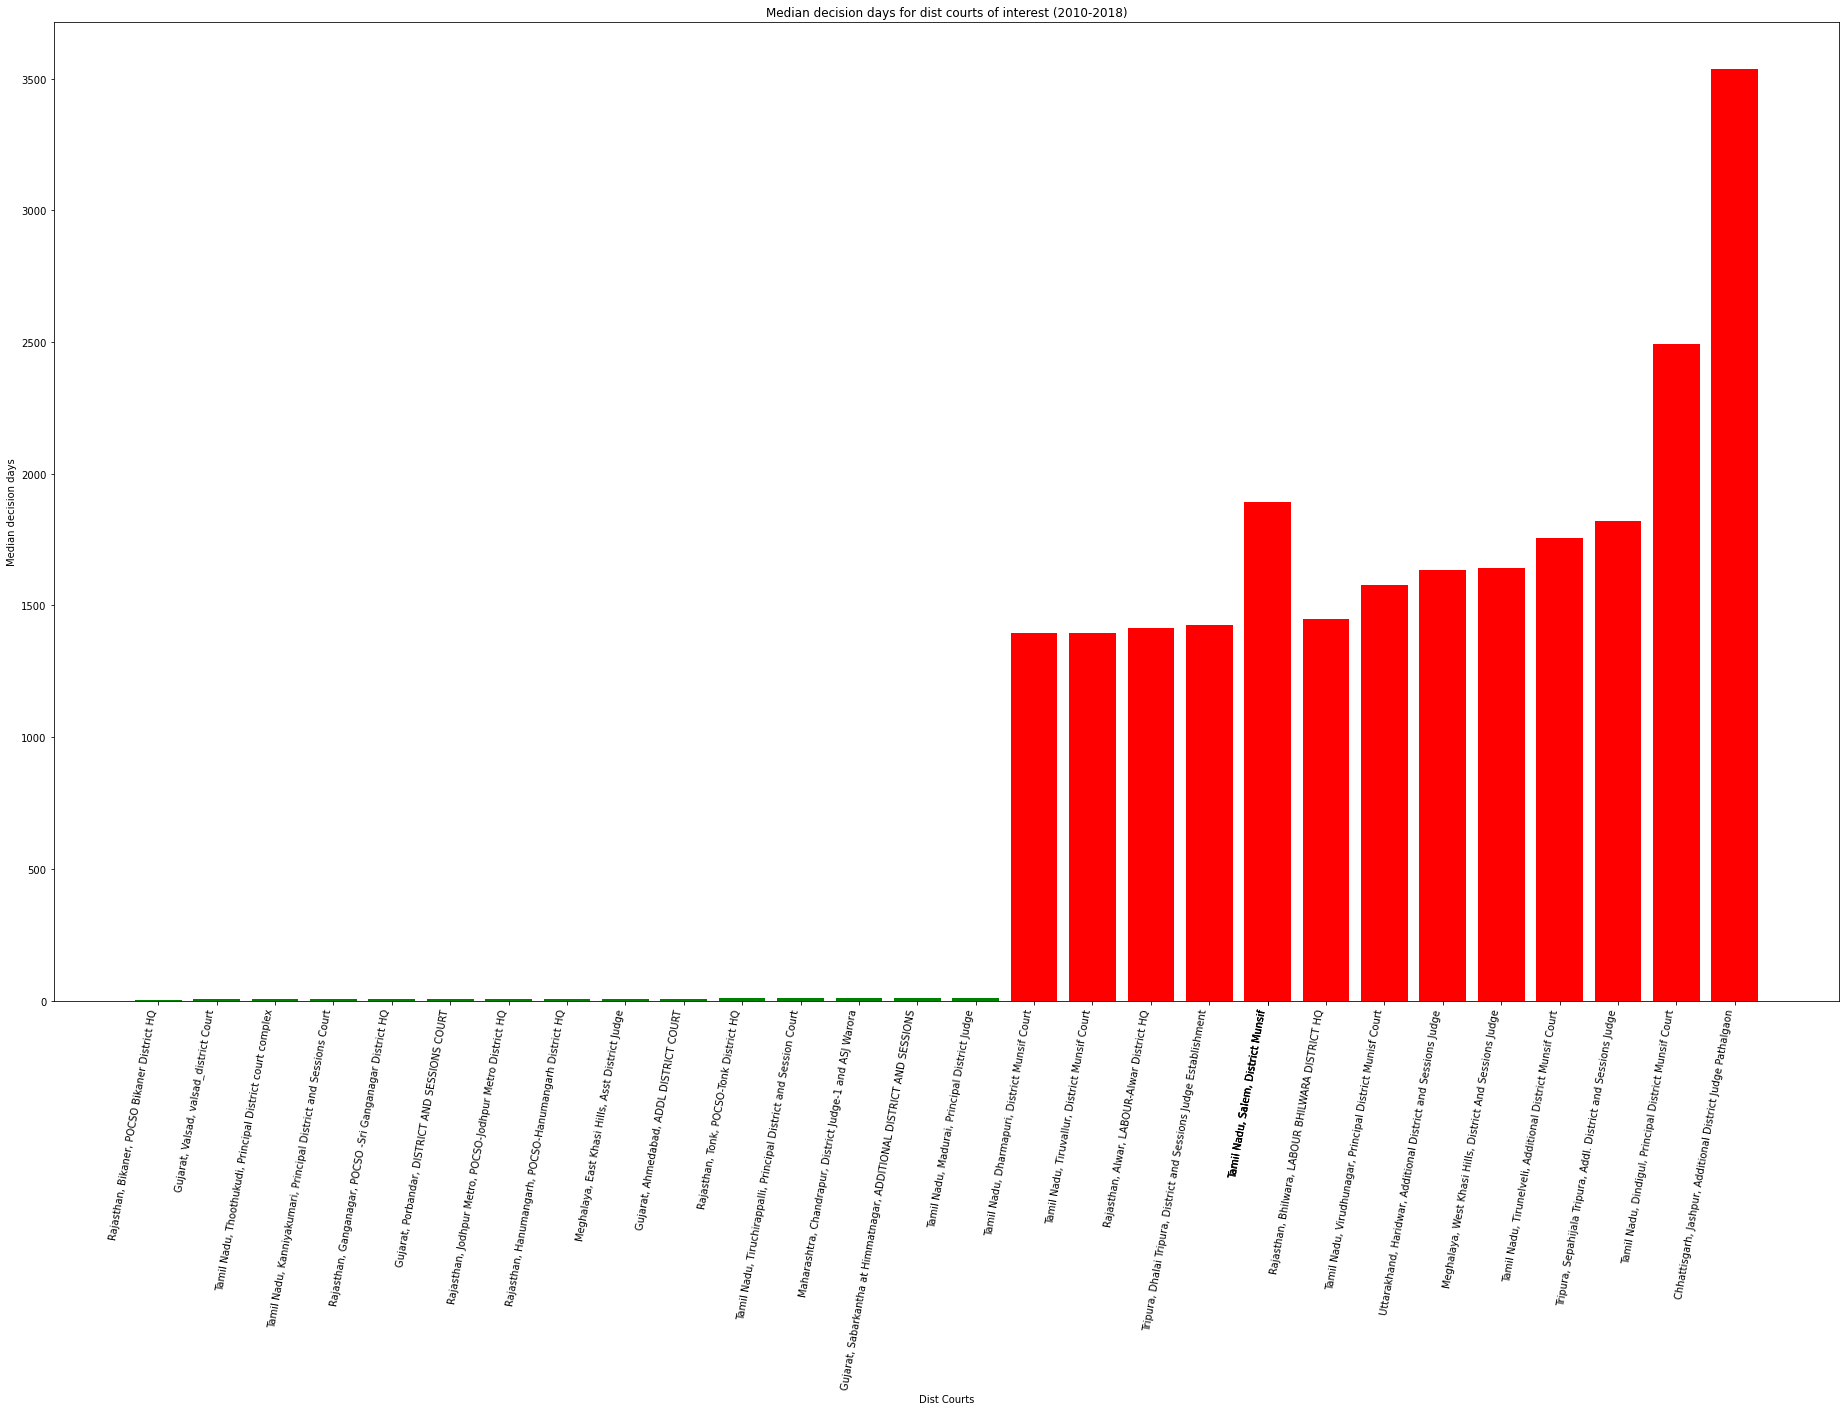

In [9]:
### BEGIN experimental cell

dist_court_case_stats = pd.read_csv('generated/all_ranked_dist_courts_with_decision_stats.csv')
dist_court_case_stats = dist_court_case_stats.drop_duplicates(subset=['state_code', 'dist_code', 'court_no'])
print(len(dist_court_case_stats.index))
dist_court_case_stats = dist_court_case_stats.sort_values(by = 'median_decision_days', ascending = True)
num_states = 15
dist_court_case_stats = dist_court_case_stats[dist_court_case_stats['median_decision_days'] > 0]
best_dist_court_data = dist_court_case_stats.iloc[0:num_states, :]
worst_dist_court_data = dist_court_case_stats.iloc[-num_states:, :]
print(len(best_dist_court_data.index))
print(len(best_dist_court_data.index))

print(best_dist_court_data.head())
print(worst_dist_court_data.head())

barColors = ['green'] * num_states
barColors.extend(['red'] * num_states)

# # f, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 20))
f = plt.figure()
f.set_figwidth(32)
f.set_figheight(18)
x_labels = [f'{s}, {d}, {c}' for s,d,c in zip(best_dist_court_data['state_name'], best_dist_court_data['district_name'], best_dist_court_data['court_name'])]
x_labels.extend([f'{s}, {d}, {c}' for s,d,c in zip(worst_dist_court_data['state_name'], worst_dist_court_data['district_name'], worst_dist_court_data['court_name'])])
heights = list(best_dist_court_data['median_decision_days'])
heights.extend(worst_dist_court_data['median_decision_days'])
plt.bar(x = x_labels, height = heights, color = barColors)
plt.title('Median decision days for dist courts of interest (2010-2018)')
plt.xticks(x_labels, rotation=80, ha='right')
plt.xlabel('Dist Courts')
plt.ylabel('Median decision days')
f.savefig('generated/courts_of_interest_simple_rank.png', bbox_inches="tight")
### END experimental cell

In [35]:
simple_courts_of_interest = pd.read_csv('generated/overall_courts_of_interest_simple.csv')
dist_court_judge_stats = pd.read_csv('generated/district_court_tenure_and_judge_stats.csv')
simple_courts_of_interest = pd.merge(simple_courts_of_interest, dist_court_judge_stats, on = ['state_code', 'dist_code', 'court_no'], how ="left")
simple_courts_of_interest.to_csv('generated/overall_courts_of_interest_simple.csv')


In [5]:
### BEGIN experimental cell
mv = pd.read_csv('generated/MV_case_stats_by_year_state_2014.csv')
ni= pd.read_csv('generated/NI_case_stats_by_year_state_2014.csv')
ipc= pd.read_csv('generated/IPC_case_stats_by_year_state_2014.csv')
actFamilies = ['MV', 'NI', 'IPC']
sorted_dfs = [mv, ni, ipc]
years = [f'20{i}' for i in range(14,19)]
print('act_family,year,a,b,c,d,e')
for act_family, sorted_df in zip(actFamilies, sorted_dfs):
    for year in years:
        yearData = sorted_df[sorted_df['year'] == int(year)]
        a = yearData['A_count'].sum()
        b = yearData['B_count'].sum()
        c = yearData['C_count'].sum()
        d = yearData['D_count'].sum()
        e = yearData['E_count'].sum()
        total = a + b + c + d + e
        print(f'{act_family},{year},{a/total},{b/total},{c/total},{d/total},{e/total}')
### END experimental cell

act_family,year,a,b,c,d,e
MV,2014,0.559769393046363,0.3236106414158494,0.11264030468460634,0.003975634893795191,4.025959386121713e-06
MV,2015,0.6614931318189032,0.28727965758930174,0.05079074958657799,0.00043518106092022875,1.2799442968242022e-06
MV,2016,0.7440213360824638,0.2510666146151154,0.004912049302420776,0.0,0.0
MV,2017,0.8715336058620752,0.1275831573627881,0.0008809807425054596,0.0,2.2560326312559784e-06
MV,2018,0.9438085808580858,0.05619141914191419,0.0,0.0,0.0
NI,2014,0.48473094227396357,0.37313743931267634,0.13607686637350347,0.006054752039856638,0.0
NI,2015,0.4284037812191768,0.46045630935153387,0.11042955091422661,0.0007103585150627204,0.0
NI,2016,0.45332690651023505,0.5247441235590926,0.021928969930672355,0.0,0.0
NI,2017,0.6302286641063857,0.36785769674602486,0.0019136391475894192,0.0,0.0
NI,2018,0.7729693068556167,0.22703069314438332,0.0,0.0,0.0
IPC,2014,0.4919546410108373,0.31954244362078615,0.17853895164264003,0.00995808744782967,5.876277906811047e-06
IPC,2015,0.58689

In [4]:
### BEGIN act analysis
state_keys = pd.read_csv('keys/_/cases_state_key.csv')

# mv = pd.read_csv('generated/mv_case_stats_by_year_state.csv')
# ni= pd.read_csv('generated/ni_case_stats_by_year_state.csv')
# ipc= pd.read_csv('generated/ipc_case_stats_by_year_state.csv')
mv = pd.read_csv('generated/MV_case_stats_by_year_state_.csv')
ni= pd.read_csv('generated/NI_case_stats_by_year_state_.csv')
ipc= pd.read_csv('generated/IPC_case_stats_by_year_state_.csv')
sorted_mv = mv.sort_values(by='median_decision_days', ascending=True)
sorted_ni = ni.sort_values(by='median_decision_days', ascending=True)
sorted_ipc = ipc.sort_values(by='median_decision_days', ascending=True)

years = [f'20{i}' for i in range(10,12)]
sorted_mv = sorted_mv[sorted_mv['num_cases'] >= 100]
sorted_ni = sorted_ni[sorted_ni['num_cases'] >= 100]
sorted_ipc = sorted_ipc[sorted_ipc['num_cases'] >= 100]

sorted_mv = sorted_mv.merge(state_keys, how = 'inner', on = ['state_code', 'year'])
sorted_ni = sorted_ni.merge(state_keys, how = 'inner', on = ['state_code', 'year'])
sorted_ipc = sorted_ipc.merge(state_keys, how = 'inner', on = ['state_code', 'year'])
sorted_dfs = [sorted_mv, sorted_ni, sorted_ipc]
# print(sorted_ipc[sorted_ipc['year'] == 2010])

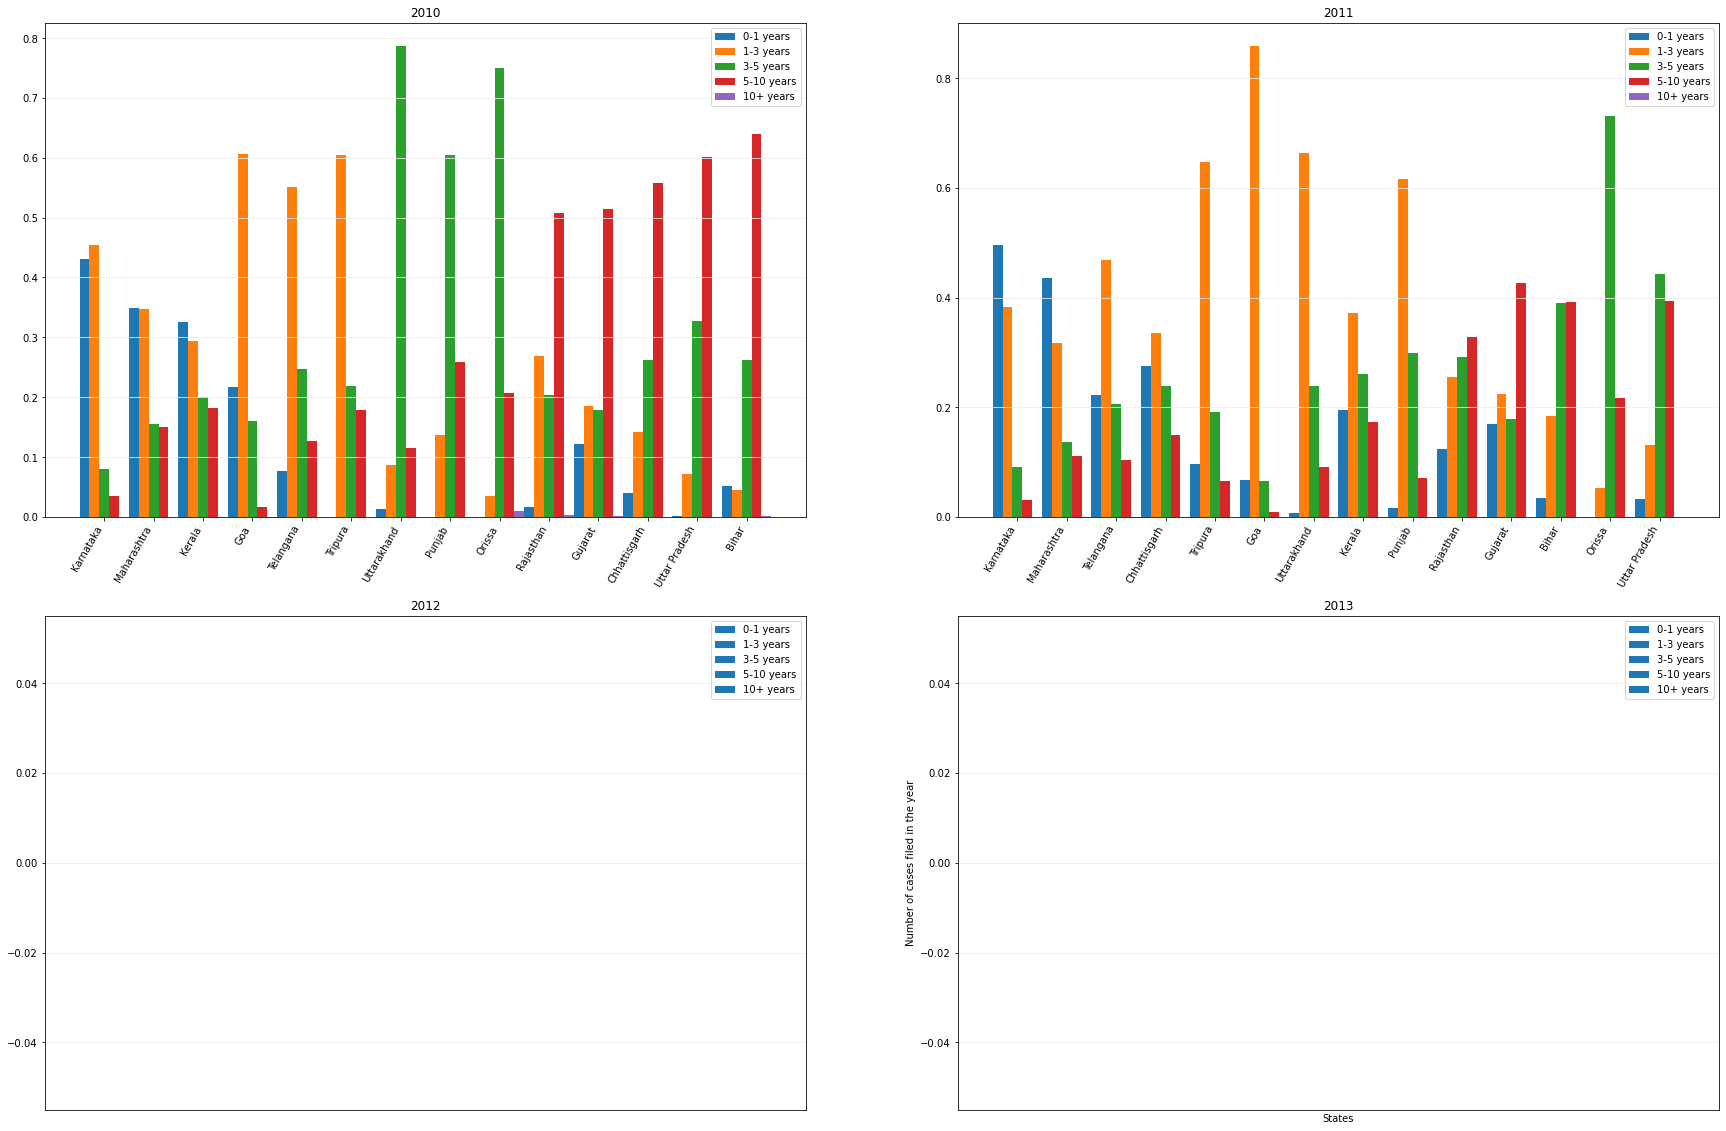

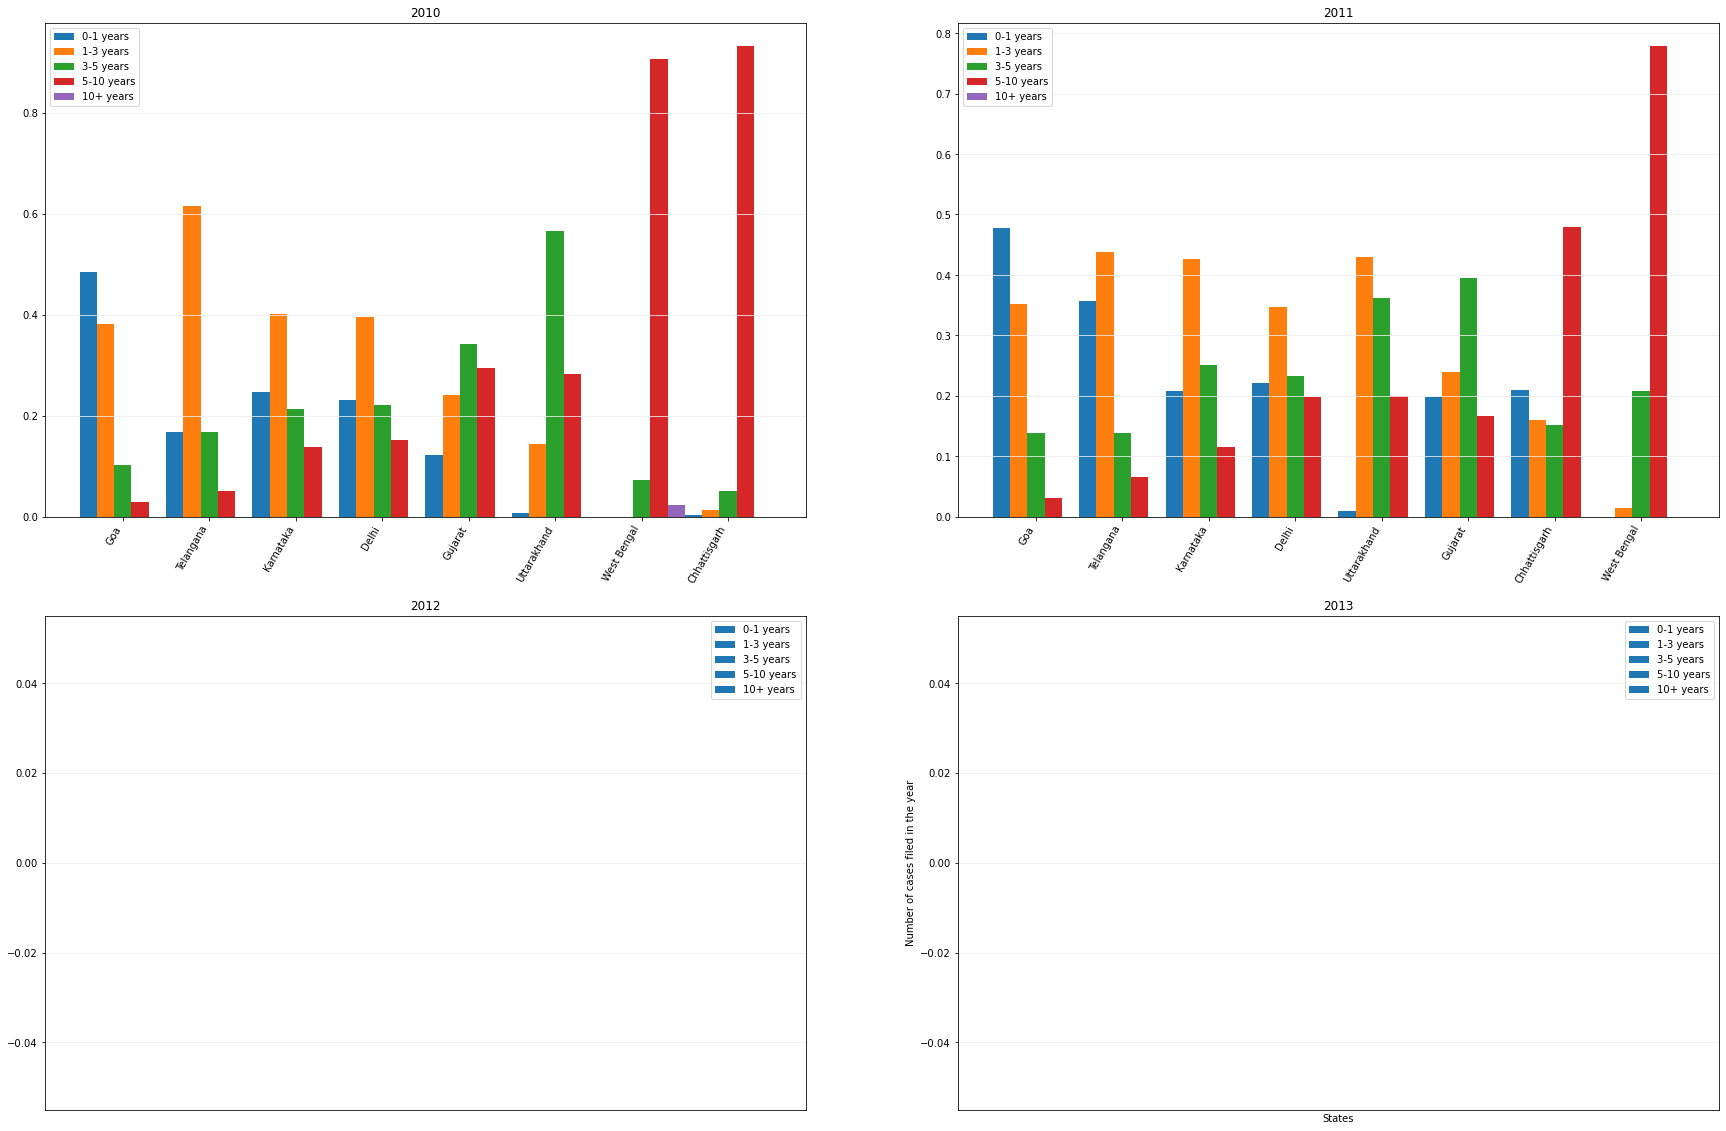

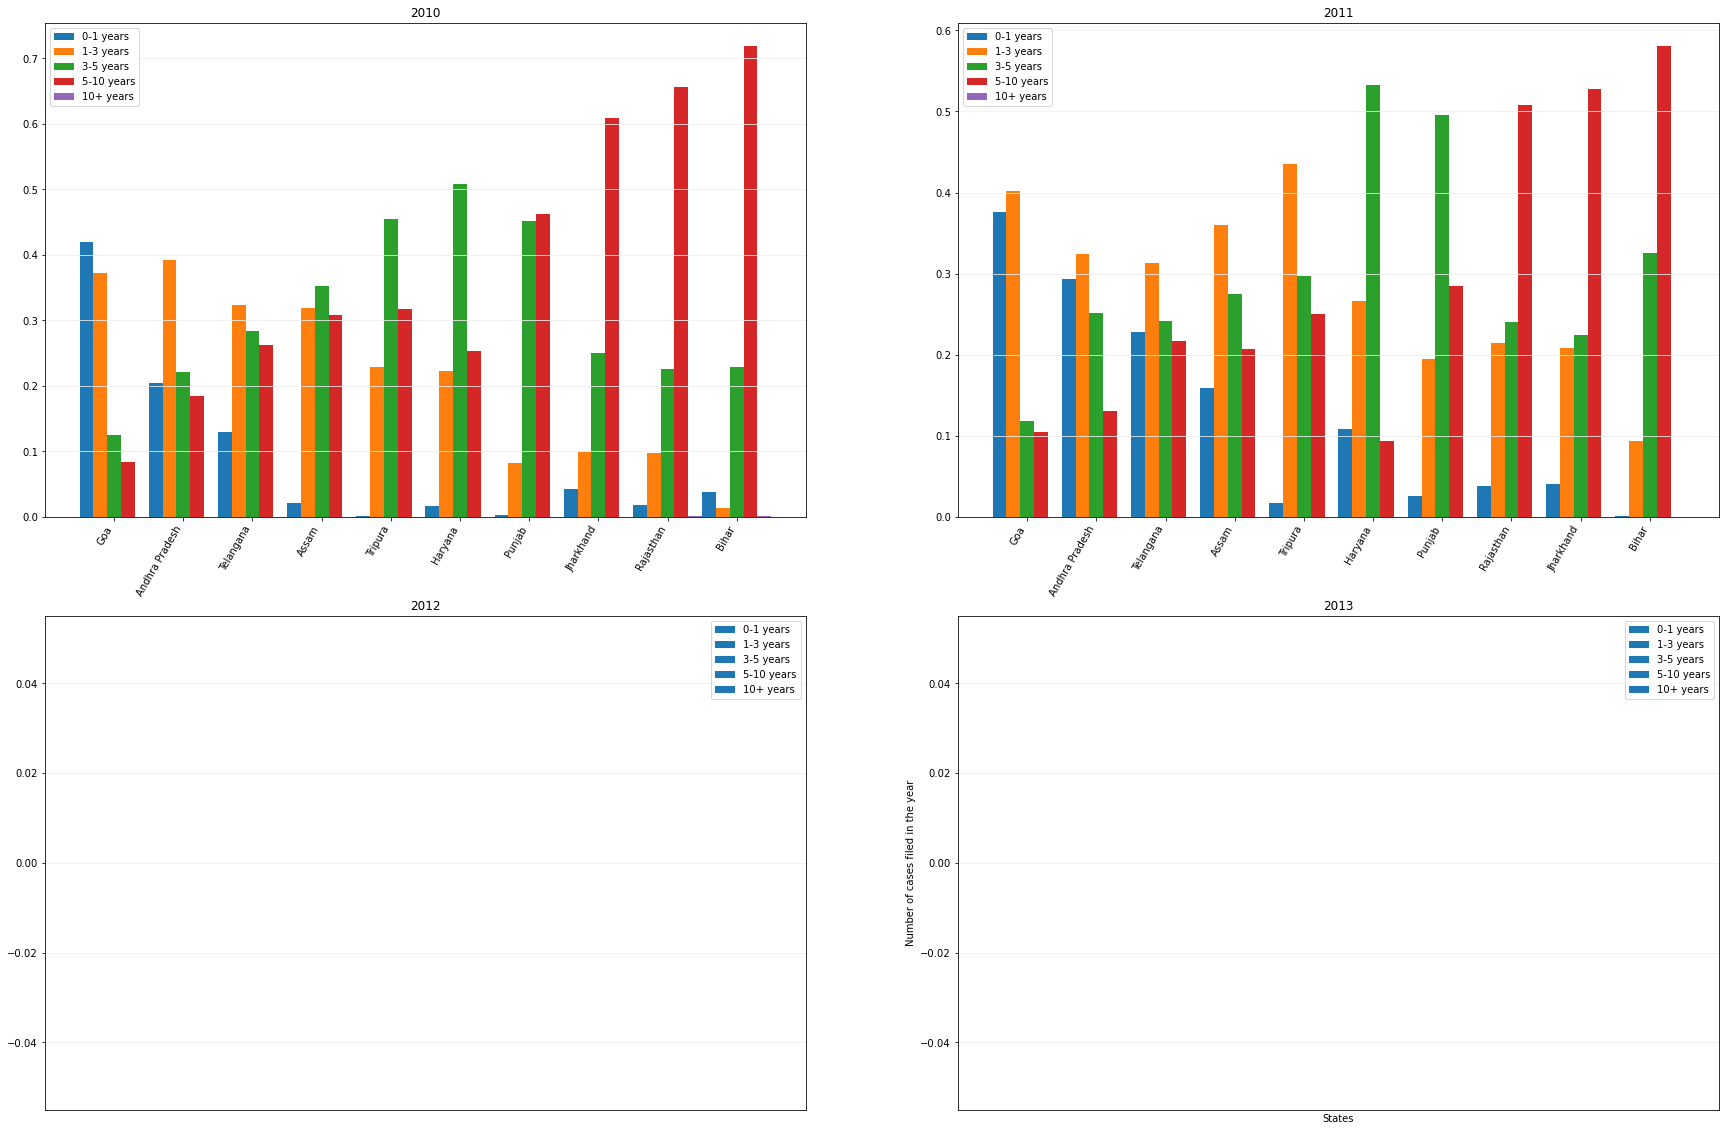

In [5]:
# best_states = {'MV' : [3, 23, 26, 1, 14, 2, 4, 30, 11, 9, 17, 18, 7, 13, 8, 16],
#                'NI' : [30, 29, 4, 3, 1, 27, 26, 2, 11, 7, 5, 10, 13, 9, 16, 18],
#                'IPC' : [3, 30, 31, 4, 21, 2, 1, 32, 9, 11, 8, 5, 13, 10, 18, 16]
#               }
best_states = {'MV' : [13, 22, 12, 3, 15, 1, 17, 30],
               'NI' : [29, 30, 3, 17],
               'IPC' : [22, 25, 7, 14, 24, 8]
              }
worst_states = {'MV' : [29, 11, 9, 18, 8, 20, 4],
               'NI' : [26, 12, 15, 18, 16, 8],
               'IPC' : [29, 6, 9, 20, 30, 2]
               }

def plotStateGraphs(data, best_state_code_list, worst_state_code_list, years, fileName, nrows = 3, ncols = 2, graphType = 'bar'):
    indexFilter = data['state_code'] == best_state_code_list[0]
    barColors = ['green'] * len(best_state_code_list)
    barColors.extend(['red'] * len(worst_state_code_list))
    
    for sc in best_state_code_list:
        indexFilter = np.logical_or(indexFilter, data['state_code'] == sc)
    
    for sc in worst_state_code_list:
        indexFilter = np.logical_or(indexFilter, data['state_code'] == sc)
    
    data = data[indexFilter]
        
    
    f, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 20))
    count = 0
    
#     temp = pd.DataFrame(columns = data.columns)
    
    for row in range(nrows):
        for col in range(ncols):
            year_data = data[data['year'] == years[count]]
            year_data = year_data.sort_values(by='median_decision_days', ascending=True)
#             temp = temp.append(year_data)
            
            if graphType == 'bar':
                axs[row,col].bar(x = year_data['state_name'], height = year_data['median_decision_days'], color = barColors)
                axs[row,col].set_title(years[count])
                axs[row,col].set_xticklabels( year_data['state_name'], rotation=60, ha='right')
                plt.xlabel('States')
                plt.ylabel('Median decision days')
            else:
                x = np.arange(len(year_data['state_name']))
                bar_width = 0.2
                
                axs[row,col].bar(x, height = year_data['A_count']/year_data['num_cases'], width = bar_width, label = '0-1 years')
                axs[row,col].bar(x + bar_width, height = year_data['B_count']/year_data['num_cases'], width = bar_width, label = '1-3 years')
                axs[row,col].bar(x + 2*bar_width, height = year_data['C_count']/year_data['num_cases'], width = bar_width, label = '3-5 years')
                axs[row,col].bar(x + 3*bar_width, height = year_data['D_count']/year_data['num_cases'], width = bar_width, label = '5-10 years')
                axs[row,col].bar(x + 4*bar_width, height = year_data['E_count']/year_data['num_cases'], width = bar_width, label = '10+ years')
#                 axs[row,col].bar(x, height = year_data['A_count'], width = bar_width, label = '0-1 years')
#                 axs[row,col].bar(x + bar_width, height = year_data['B_count'], width = bar_width, label = '1-3 years')
#                 axs[row,col].bar(x + 2*bar_width, height = year_data['C_count'], width = bar_width, label = '3-5 years')
#                 axs[row,col].bar(x + 3*bar_width, height = year_data['D_count'], width = bar_width, label = '5-10 years')
#                 axs[row,col].bar(x + 4*bar_width, height = year_data['E_count'], width = bar_width, label = '10+ years')
                axs[row,col].set_title(years[count])
                axs[row,col].set_xticks( x + 2*bar_width)
                axs[row,col].set_xticklabels( year_data['state_name'], rotation=60, ha='right')
                axs[row,col].legend()
                axs[row,col].yaxis.grid(True, color='#EEEEEE')
                axs[row,col].xaxis.grid(False)
                plt.xlabel('States')
                plt.ylabel('Number of cases filed in the year')
            count += 1
    plt.savefig(f'generated/{fileName}.png')
#     temp.to_csv(f'generated/{fileName}.csv')
        

bestCount = 10
actFamilies = ['MV', 'NI', 'IPC']

for act_family, sorted_df in zip(actFamilies, sorted_dfs):
#     plotStateGraphs(sorted_df, best_states[act_family], worst_states[act_family], [i for i in range(2014, 2020)], f'{act_family}_state_comparison_by_decision_days_.png')
#     plotStateGraphs(sorted_df, best_states[act_family], worst_states[act_family], [i for i in range(2014, 2020)], f'{act_family}_state_comparison_by_decision_days_category_counts.png', graphType = 'groupedBar')
    plotStateGraphs(sorted_df, best_states[act_family], worst_states[act_family], [i for i in range(2010, 2014)], f'{act_family}_state_comparison_by_decision_days_category_fractions_2010_', nrows = 2, ncols = 2, graphType = 'groupedBar')


In [9]:
# bestCount = 16
# temp = pd.read_csv('generated/IPC_case_stats_by_year_state_combined.csv')
# actFamilies = ['IPC']
# temp = temp.sort_values(by = 'median_decision_days', ascending = True)
# sorted_dfs = [temp]
# years = [f'20{i}' for i in range(10,19)]
for act_family, sorted_df in zip(actFamilies, sorted_dfs):
    print(act_family)
    best_states = set(sorted_df[sorted_df['year'] == 2014].head(n = bestCount)['state_code'].to_string(index=False).split())
    for y in years:
        best_states = best_states.intersection(sorted_df[sorted_df['year'] == int(y)].head(n = bestCount)['state_code'].to_string(index=False).split())

    print('Best ', best_states)

    worst_states = set(sorted_df[sorted_df['year'] == 2014].tail(n = bestCount)['state_code'].to_string(index=False).split())
    
    for y in years:
#         print(worst_states)
        worst_states = worst_states.intersection(set(sorted_df[sorted_df['year'] == int(y)].tail(n = bestCount)['state_code'].to_string(index=False).split()))

    print('Worst ', worst_states)

IPC
Best  {'24'}
Worst  {'9'}


In [24]:
print(years)

['2014', '2015']


In [ ]:
bestCount = 100
actFamilies = ['MV', 'NI', 'IPC']
court_keys = pd.read_csv('keys/_/cases_court_key.csv')

mv = pd.read_csv('generated/MV_case_stats_by_year_court.csv')
# mv[mv['year'] == 2014].head(n = bestCount).loc[:,['state_code', 'dist_code', 'court_no']].to_string(index=False).split('\n')
ni= pd.read_csv('generated/NI_case_stats_by_year_court.csv')
ipc= pd.read_csv('generated/IPC_case_stats_by_year_court.csv')
sorted_mv = mv.sort_values(by='median_decision_days', ascending=True)
sorted_ni = ni.sort_values(by='median_decision_days', ascending=True)
sorted_ipc = ipc.sort_values(by='median_decision_days', ascending=True)

years = [f'20{i}' for i in range(14,19)]
sorted_mv = sorted_mv[sorted_mv['num_cases'] >= 100]
sorted_ni = sorted_ni[sorted_ni['num_cases'] >= 100]
sorted_ipc = sorted_ipc[sorted_ipc['num_cases'] >= 100]

sorted_mv = sorted_mv.merge(court_keys, how = 'inner', on = ['year', 'state_code', 'dist_code', 'court_no'])
sorted_ni = sorted_ni.merge(court_keys, how = 'inner', on = ['year', 'state_code', 'dist_code', 'court_no'])
sorted_ipc = sorted_ipc.merge(court_keys, how = 'inner', on = ['year', 'state_code', 'dist_code', 'court_no'])
sorted_dfs = [sorted_mv, sorted_ni, sorted_ipc]

for act_family, sorted_df in zip(actFamilies, sorted_dfs):
    print(act_family)
    best_courts = set(sorted_df[sorted_df['year'] == 2014].head(n = bestCount).loc[:,['state_code', 'dist_code', 'court_no']].to_string(index=False).split('\n'))
    for year in years:
        best_courts = best_courts.intersection(sorted_df[sorted_df['year'] == int(year)].head(n = bestCount).loc[:,['state_code', 'dist_code', 'court_no']].to_string(index=False).split('\n'))

    print('Best ', best_courts)

    worst_courts = set(sorted_df[sorted_df['year'] == 2014].tail(n = bestCount).loc[:,['state_code', 'dist_code', 'court_no']].to_string(index=False).split('\n'))
    for year in years:
        worst_courts = worst_courts.intersection(sorted_df[sorted_df['year'] == int(year)].tail(n = bestCount).loc[:,['state_code', 'dist_code', 'court_no']].to_string(index=False).split('\n'))

    print('Worst ', worst_courts)

In [ ]:
select_courts = {
	'MV' : {
		'Best' : [(3,7,1),
		 (3,14,1),
		 (3,8,1),
		 (3,19,1),
		 (3,12,1),
		 (1,4,8)],
		'Worst' : [(4,11,4),
		 (4,2,39),
		 (10,12,14),
		 (13,19,2),
		 (10,12,15),
		 (6,1,12),
		 (4,9,11),
		 (16,20,1)]
	},


	'NI' : {
		'Best' : [(22,6,1),
	 (1,37,2),
	 (22,11,1),
	 (29,9,2),
	 (22,8,1),
	 (3,16,6),
	 (3,23,16),
	 (29,2,3)],
		'Worst' : [(9,28,17),
	 (9,6,11)]
	},

	'IPC' : {
		'Best' : [(14,17,1),
	 (14,9,1),
	 (17,30,15),
	 (10,3,12)],
		'Worst' : [(4,2,42),
	 (8,39,2),
	 (16,17,8),
	 (16,22,2),
	 (13,76,9),
	 (8,17,4),
	 (8,38,5),
	 (8,1,12),
	 (16,24,1),
	 (8,38,2)]
	 }
}

In [ ]:
# actFamilies = ['MV', 'NI', 'IPC']

# for act_family, sorted_df in zip(actFamilies, sorted_dfs):
# #     plotStateGraphs(sorted_df, best_states[act_family], worst_states[act_family], [i for i in range(2014, 2020)], f'{act_family}_state_comparison_by_decision_days.png')
#     plotStateGraphs(sorted_df, best_states[act_family], worst_states[act_family], [i for i in range(2014, 2020)], f'{act_family}_state_comparison_by_decision_days_category_fractions.png', graphType = 'groupedBar')


#filter out the entries corresponding to select_courts
actFamily = 'MV'
indexFilter = np.array([False] * len(sorted_mv))
for scn in select_courts[actFamily]['Best']:
    indexFilter = np.logical_or(indexFilter, np.logical_and(np.logical_and(sorted_mv['state_code'] == scn[0], sorted_mv['dist_code'] == scn[1]), sorted_mv['court_no'] == scn[2]))

for scn in select_courts[actFamily]['Worst']:
    indexFilter = np.logical_or(indexFilter, np.logical_and(np.logical_and(sorted_mv['state_code'] == scn[0], sorted_mv['dist_code'] == scn[1]), sorted_mv['court_no'] == scn[2]))

sorted_mv = sorted_mv[indexFilter]
temp_df = sorted_mv.loc[:,['state_code', 'dist_code', 'court_no']]
temp_df = temp_df.drop_duplicates()

# Using DataFrame.insert() to add a column

# temp_df.insert(0, "dummy_col", temp_df.loc[:,['state_code']], True)

court_wise_tenures_by_year = utils.analyze_dist_court_wise_tenures_by_year(temp_df) #should have s,d,c at 1,2,3 in each row
#not all courts have judges assigned in the dataset

In [ ]:



# sorted_mv['year'] = sorted_mv['year'].astype(str)
merged = court_wise_tenures_by_year.merge(sorted_mv, how = 'inner', on = ['year', 'state_code', 'dist_code', 'court_no'])
merged = merged.sort_values(by='median_decision_days', ascending=True)
# print(merged.head())
x = np.arange(len(merged.index))
                
plt.scatter(x, merged['avg_judge_count'])
print(merged)

### END act analysis

In [ ]:
### BEGIN tenure-strength analysis
dist_court_df = pd.read_csv('D:/Downloads/IISC/filtered_dist_court_nos.csv')
print(len(dist_court_df))
# temp_stats = utils.analyze_dist_court_wise_tenures_and_productivity(dist_court_df)
temp_stats = pd.read_csv('generated/district_court_tenure_and_judge_stats.csv')
print(len(temp_stats))

In [ ]:
ll, lh, hl, hh = utils.group_courts_by_tenure_and_strength(temp_stats, 666.5, 1.067)
# plt.hist(temp_stats['median_tenure_days'], bins=20)
# print(len(temp_stats))
# print(len(temp_stats[temp_stats['median_tenure_days'] <= 200]))


In [ ]:
print(ll.head())
print(lh.head())
print(hl.head())
print(hh.head())

In [ ]:
# temp_case_stats = utils.get_case_stats_for_courts(dist_court_df, 'cases/_', 1, 2, 3,'generated/district_court_case_decision_stats.csv') #check case file path inside the function
temp_case_stats = pd.read_csv('generated/district_court_case_decision_stats.csv')

In [ ]:
#append lh, hh #high working strength
high_working_strength = pd.concat([lh, hh])
# inner join with temp_case_stats on s,d,c
high_working_strength_case_stats = high_working_strength.merge(temp_case_stats, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
# high_working_strength_case_stats.to_csv('generated/dist_high_working_strength_case_stats.csv')
# scatter plot tenure and disposal time # does higher tenure lead to better (less) disposal times?
# categories = np.unique(tenure_pendency_by_year_dist['year'])
# colors = np.linspace(0, 1, len(categories))
# colordict = dict(zip(categories, colors))  

# tenure_pendency_by_year_dist["Color"] = tenure_pendency_by_year_dist['year'].apply(lambda x: colordict[x])
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
x = np.array(high_working_strength_case_stats[high_working_strength_case_stats['avg_judge_count'] > 2]['median_tenure_days'])
y = np.array(high_working_strength_case_stats[high_working_strength_case_stats['avg_judge_count'] > 2]['median_decision_days'])
plt.scatter(x, y)
plt.xlabel('court WS')
plt.ylabel('decision days')
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x))
print(p)
print('Corr Coef : ', np.corrcoef(y, p(x)))
# plt.hist(high_working_strength_case_stats['avg_judge_count'])

In [ ]:
# cases_base_path = 'cases/_'
# temp_case_pendency_stats = utils.analyze_dist_court_wise_case_pendency_per_year(dist_court_df, cases_base_path, 1, 2, 3,'generated/dist_court_wise_pendency_rates_per_year.csv')

In [ ]:
# yearwise_tenures = utils.analyze_dist_court_wise_tenures_by_year(dist_court_df)
yearwise_tenures = pd.read_csv('generated/dist_court_wise_tenures_by_year.csv')

In [ ]:
#append lh, hh #high working strength
temp_case_pendency_stats = pd.read_csv('generated/dist_court_wise_pendency_rates_per_year.csv')
temp_case_pendency_stats['year'] = temp_case_pendency_stats['year'].astype(str)
high_working_strength = pd.concat([lh, hh])
# inner join with yearwise_tenures on year,s,d,c to filter only high working strength courts

high_working_strength_tenures_by_year = high_working_strength.merge(yearwise_tenures, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
temp_case_pendency_stats['year'] = temp_case_pendency_stats['year'].astype(str)
high_working_strength_tenures_by_year['year'] = high_working_strength_tenures_by_year['year'].astype(str)
high_working_strength_tenures_and_pendency_by_year = high_working_strength_tenures_by_year.merge(temp_case_pendency_stats, how = 'inner', on = ['year', 'state_code', 'dist_code', 'court_no'])

# scatter plot tenure and disposal time # does higher tenure lead to better (less) disposal times?
categories = np.unique(high_working_strength_tenures_and_pendency_by_year['year'])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  

high_working_strength_tenures_and_pendency_by_year["Color"] = high_working_strength_tenures_and_pendency_by_year['year'].apply(lambda x: colordict[x])

f, axs = plt.subplots()
f.set_figwidth(10)
f.set_figheight(10)
x = np.array(high_working_strength_tenures_and_pendency_by_year[high_working_strength_tenures_and_pendency_by_year['avg_daily_judge_count'] > 2]['weighted_mean_tenure'])
y = np.array(high_working_strength_tenures_and_pendency_by_year[high_working_strength_tenures_and_pendency_by_year['avg_daily_judge_count'] > 2]['new_clearance_rate'])
color = np.array(high_working_strength_tenures_and_pendency_by_year[high_working_strength_tenures_and_pendency_by_year['avg_daily_judge_count'] > 2]['year']).astype(int)
scatterplot = axs.scatter(x, y, c = color)
legend1 = axs.legend(*scatterplot.legend_elements(), loc="lower right", title="Years")
axs.add_artist(legend1)
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.xlabel('Median tenure days')
plt.ylabel('New clearance rate')
plt.plot(x,p(x))
plt.savefig('generated/high_working_strength_tenures_and_pendency_by_year.png')
print(p)
print(np.corrcoef(y,p(x)))
print(colordict)
# plt.hist(high_working_strength_case_stats['avg_judge_count'])

In [ ]:
high_working_strength_tenures_and_pendency_by_year.to_csv('generated/high_working_strength_tenures_and_pendency_by_year.csv')

In [ ]:
temp_case_pendency_stats = pd.read_csv('generated/dist_court_wise_pendency_rates_per_year.csv')
# temp_case_pendency_stats['year'] = temp_case_pendency_stats['year'].astype(str)
# inner join with temp_case_stats on s,d,c
judge_case_stats = yearwise_tenures.merge(temp_case_pendency_stats, how = 'inner', on = ['year', 'state_code', 'dist_code', 'court_no'])
judge_case_stats.insert(len(judge_case_stats.columns), 'work_load', judge_case_stats['num_instituted']/judge_case_stats['avg_daily_judge_count'])
# scatter plot tenure and disposal time # does higher tenure lead to better (less) disposal times?
categories = np.unique(judge_case_stats['year'])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors))  

judge_case_stats["Color"] = judge_case_stats['year'].apply(lambda x: colordict[x])

f, axs = plt.subplots()

f.set_figwidth(10)
f.set_figheight(10)
judge_case_stats = judge_case_stats[judge_case_stats['avg_daily_judge_count'] > 0.5]
judge_case_stats = judge_case_stats[judge_case_stats['total_judge_count'] > 1]
judge_case_stats = judge_case_stats[judge_case_stats['num_instituted'] > 100]
print(judge_case_stats.columns)
x = np.array(judge_case_stats['work_load'])
y = np.array(judge_case_stats['median_decision_days'])
color = np.array(judge_case_stats['year']).astype(int)
scatterplot = axs.scatter(x, y, c = color)
legend1 = axs.legend(*scatterplot.legend_elements(), loc="lower right", title="Years")
axs.add_artist(legend1)
z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.xlabel('work load per judge')
plt.ylabel('median decision days')
plt.plot(x,p(x))
plt.savefig('generated/district_court_decision_days_vs_work_load.png')
print(p)
print(np.corrcoef(y,p(x)))
# plt.hist(high_working_strength_case_stats['avg_judge_count'])

In [ ]:
yearwisetenures = pd.read_csv('generated/dist_court_wise_tenures_by_year.csv')
temp_case_pendency_stats = pd.read_csv('generated/dist_court_wise_pendency_rates_per_year.csv')
# inner join with temp_case_stats on s,d,c
judge_case_stats = yearwisetenures.merge(temp_case_pendency_stats, how = 'inner', on = ['year', 'state_code', 'dist_code', 'court_no'])
judge_case_stats.insert(len(judge_case_stats.columns), 'work_load', judge_case_stats['num_instituted']/judge_case_stats['total_judge_count'])
# scatter plot tenure and disposal time # does higher tenure lead to better (less) disposal times?
f, axs = plt.subplots()

f.set_figwidth(10)
f.set_figheight(10)

judge_case_stats = judge_case_stats[judge_case_stats['total_judge_count'] >= 1]
judge_case_stats = judge_case_stats[judge_case_stats['avg_daily_judge_count'] > 0.5]
x = np.array(judge_case_stats[judge_case_stats['num_instituted'] > 1000]['work_load'])
y = np.array(judge_case_stats[judge_case_stats['num_instituted'] > 1000]['new_clearance_rate'])
color = np.array(judge_case_stats[judge_case_stats['num_instituted'] > 1000]['year']).astype(int)
plt.xlabel('work load per avg judge')
plt.ylabel('new clearance rate for the court')
scatterplot = axs.scatter(x, y, c = color)
legend1 = axs.legend(*scatterplot.legend_elements(), loc="lower right", title="Years")
axs.add_artist(legend1)

z = np.polyfit(x,y,1)
p = np.poly1d(z)
plt.plot(x,p(x))
print(p)
print(np.corrcoef(y, p(x)))
plt.savefig('generated/district_court_clearance_rate_vs_work_load.png')
# plt.hist(high_working_strength_case_stats['avg_judge_count'])
### END tenure-strength analysis

In [ ]:
# jt, jt_by_year = utils.analyze_dist_wise_judge_tenures_for(3)
# jt.to_csv('generated/karnataka_judge_tenures.csv')
# jt_by_year.to_csv('generated/karnataka_judge_tenures_by_year.csv')
# pendency_data = utils.analyze_dist_wise_case_pendency_per_year(3)
# pendency_data.to_csv('generated/karnataka_dist_wise_pendency_data_by_year.csv')
# year_and_dist_wise_tenures = utils.analyze_year_dist_wise_judge_tenures_for(3)
# year_and_dist_wise_tenures.to_csv('generated/karnataka_year_dist_wise_judge_tenures.csv')

# year_and_dist_wise_tenures = pd.read_csv('generated/karnataka_year_dist_wise_judge_tenures.csv')
# year_and_dist_wise_pendency_data = pd.read_csv('generated/karnataka_dist_wise_pendency_data_by_year.csv')
# tenure_pendency_by_year_dist = year_and_dist_wise_pendency_data.merge(year_and_dist_wise_tenures, how = 'inner', on = ['year', 'state_code', 'dist_code'])
# tenure_pendency_by_year_dist.to_csv('generated/tenure_pendency_by_year_dist.csv')
# date_deltas = jt['appointment_duration']
# plt.hist(date_deltas, bins = 40)
# plt.title('Karnataka')
# plt.xlabel('Appointment duration')
# plt.ylabel('Number of judges')
# tenure_pendency_by_year_dist = pd.read_csv('generated/tenure_pendency_by_year_dist.csv')
# year_and_dist_wise_pendency_data = pd.read_csv('generated/karnataka_dist_wise_pendency_data_by_year.csv')

year_and_dist_wise_judge_strength = pd.read_csv('generated/sc_3_year_dist_wise_judge_counts.csv')
year_and_dist_wise_pendency_data = pd.read_csv('generated/karnataka_dist_wise_pendency_data_by_year.csv')
strength_pendency_by_year_dist = year_and_dist_wise_pendency_data.merge(year_and_dist_wise_judge_strength, how = 'inner', on = ['year', 'state_code', 'dist_code'])
strength_pendency_by_year_dist.to_csv('generated/strength_pendency_by_year_dist.csv')


In [ ]:
cases_10 = pd.read_csv('cases/_/cases_2010.csv')
# cases_10.head()
# ddl_case_id	year	state_code	dist_code	court_no	date_of_filing	date_of_decision
cases_10.drop(['cino', 'judge_position', 'female_defendant', 'female_petitioner', 'female_adv_def', 'female_adv_pet', 'type_name', 'purpose_name', 'disp_name', 'date_first_list', 'date_last_list', 'date_next_list'], axis = 1)
acts_sections = pd.read_csv('acts_sections.csv')
# acts_sections.head()
acts_sections.drop(['section', 'bailable_ipc', 'number_sections_ipc', 'criminal'], axis = 1)


In [ ]:
acts_sections = acts_sections[acts_sections['ddl_case_id'].notnull()]
acts_sections = acts_sections[acts_sections['act'].notnull()]
case_acts = cases_10.merge(acts_sections, how = 'inner', on = ['ddl_case_id'])

In [ ]:
import re
date_for_20 = re.compile('^..-..-20[0-9][0-9]')

court_transfers = pd.DataFrame(columns = ['state_code', 'dist_code', 'court_no', 'transfers_in', 'transfers_out', 'avg_judge_count'])
for state_code in range(1, 34):
    state_judges = judges_clean[judges_clean['state_code'] == state_code]
    for dist_code in range(1, 77):
        dist_judges = state_judges[state_judges['dist_code'] == dist_code]
        if len(dist_judges) == 0:
            continue
        for court_no in range(1, 75):
            court_judges = dist_judges[dist_judges['court_no'] == court_no]
            if len(court_judges) == 0:
                continue
            transfers_in = 0
            transfers_out = 0
            avg_judge_count = 0.0
            null_end_date = court_judges['end_date'].isnull()
            earliest_start_date = '31-12-2020'
            latest_end_date = '31-12-1999'
            max_end_date = '31-12-2020'
            for idx, row in court_judges.iterrows():
                transfers_in += 1
                if not null_end_date[idx] and date_for_20.match(row['end_date']):
                    transfers_out += 1
                    avg_judge_count += (datetime.datetime.strptime(row['end_date'],"%d-%m-%Y")  - datetime.datetime.strptime(row['start_date'],"%d-%m-%Y")).days
                else:
                    avg_judge_count += (datetime.datetime.strptime(max_end_date,"%d-%m-%Y")  - datetime.datetime.strptime(row['start_date'],"%d-%m-%Y")).days
                    latest_end_date = max_end_date
                
                if ((datetime.datetime.strptime(row['start_date'],"%d-%m-%Y")  - datetime.datetime.strptime(earliest_start_date,"%d-%m-%Y")).days < 0):
                    earliest_start_date = row['start_date']
                
                if (not null_end_date[idx] and (datetime.datetime.strptime(row['end_date'],"%d-%m-%Y") - datetime.datetime.strptime(latest_end_date,"%d-%m-%Y")).days > 0):
                    latest_end_date = row['end_date']
            avg_judge_count = avg_judge_count/(datetime.datetime.strptime(latest_end_date,"%d-%m-%Y")  - datetime.datetime.strptime(earliest_start_date,"%d-%m-%Y")).days
            #save transfer info for court
            court_transfers.loc[len(court_transfers.index)] = [state_code, dist_code, court_no, transfers_in, transfers_out, avg_judge_count]
            

In [ ]:
court_transfers.head()

temp = court_transfers[court_transfers['state_code'] == 29]
temp = temp[temp['dist_code'] == 2]
temp = temp[temp['court_no'] == 3]
temp.head()
# court_transfers.to_csv('processed_per_court_judge_data.csv')

In [ ]:
# cases_10_sc23 = judges_clean[judges_clean['state_code'] == 3]
# cases_10_sc23_dc50 = cases_10_sc23[cases_10_sc23['dist_code'] == 20]
# cases_10_sc23_dc50_cn1 = cases_10_sc23_dc50[cases_10_sc23_dc50['court_no'] == 1]
# cases_10_sc23_dc50_cn1.head()

In [ ]:
# case_counts_by_court_temp = cases_10.groupby(['state_code', 'dist_code', 'court_no']).count()
case_counts_by_court_temp[case_counts_by_court_temp['year'] == 4404]
# case_counts_by_court_temp.head()

In [ ]:
import re
date_for_2010 = re.compile('2010-*')
date_for_20 = re.compile('^20[0-9][0-9]-*')

def plotDateDeltas(caseData, title):
    date_deltas = [(datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days for end_date, start_date in zip(caseData['date_of_decision'][caseData['date_of_decision'].notnull()], caseData['date_of_filing'][caseData['date_of_decision'].notnull()]) if (date_for_20.match(end_date) and (datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days > 0)]
    date_deltas_df = pd.DataFrame(date_deltas)
#     print(f'mean : {np.mean(date_deltas)}')
#     print(f'median : {np.median(date_deltas)}')
    print(date_deltas_df.describe())
    plt.hist(date_deltas, bins = 40)
    plt.title(title)
    plt.xlabel('Days to decision')
    plt.ylabel('Number of cases')

In [ ]:
# case_counts_by_court_temp = case_counts_by_court_temp.sort_values(by = 'year')
case_counts_by_court_temp.head()

In [ ]:
cases_10_sc23 = cases_10[cases_10['state_code'] == 3]
cases_10_sc23_dc50 = cases_10_sc23[cases_10_sc23['dist_code'] == 22]
cases_10_sc23_dc50_cn1 = cases_10_sc23_dc50[cases_10_sc23_dc50['court_no'] == 1]
plotDateDeltas(cases_10_sc23_dc50_cn1, '23,43,1')
temp = [(datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days for end_date, start_date in zip(cases_10_sc23_dc50_cn1['date_of_decision'][cases_10_sc23_dc50_cn1['date_of_decision'].notnull()], cases_10_sc23_dc50_cn1['date_of_filing'][cases_10_sc23_dc50_cn1['date_of_decision'].notnull()]) if (date_for_20.match(end_date) and (datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days > 0)]


In [ ]:
# cases_10_sc23_dc50_cn1.tail()
len(cases_10_sc23_dc50_cn1)

In [ ]:
len(temp)

In [ ]:
case_counts_by_court_temp.tail()

In [ ]:
np.sum(judges_clean['female_judge'][:] == '1 female') + np.sum(judges_clean['female_judge'][:] == '0 nonfemale') + np.sum(judges_clean['female_judge'][:] == '-9998 unclear')

In [ ]:
sns.countplot(x = 'female_judge', data = judges_clean)
plt.savefig('judge_gender_distribution.png')

In [ ]:
date_deltas = [(datetime.datetime.strptime(end_date,"%d-%m-%Y")  - datetime.datetime.strptime(start_date,"%d-%m-%Y")).days for end_date, start_date in zip(judges_clean['end_date'][judges_clean['end_date'].notnull()], judges_clean['start_date'][judges_clean['end_date'].notnull()])]

In [ ]:
sns.distplot(date_deltas, bins = 25, kde = True)
plt.savefig('judge_gender_distribution.png')

In [ ]:
plt.hist(date_deltas, bins = 40)
plt.xlabel('position held for days')
plt.ylabel('number of judges')
plt.savefig('judge_position_duration.png')

In [ ]:
cases_10 = pd.read_csv('cases/_/cases_2010.csv')

In [ ]:
cases_10.head()

In [ ]:
import re
date_for_2010 = re.compile('2010-*')
date_for_20 = re.compile('^20[0-9][0-9]-*')
case_durations = pd.DataFrame(columns = ['state_code', 'dist_code', 'court_no', 'median', 'mean', 'case_count'])
for state_code in range(1, 34):
    state_cases = cases_10[cases_10['state_code'] == state_code]
    for dist_code in range(1, 77):
        dist_cases = state_cases[state_cases['dist_code'] == dist_code]
        if len(dist_cases) == 0:
            continue
        for court_no in range(1, 75):
            court_cases = dist_cases[dist_cases['court_no'] == court_no]
            if len(court_cases) == 0:
                continue
            case_count = len(court_cases)
            case_date_deltas = [(datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days for end_date, start_date in zip(court_cases['date_of_decision'][court_cases['date_of_decision'].notnull()], court_cases['date_of_filing'][court_cases['date_of_decision'].notnull()]) if (date_for_20.match(end_date) and (datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days > 0)]
            if (len(case_date_deltas) > 0):
                median = np.median(case_date_deltas)
                mean = np.mean(case_date_deltas)
            
                #save transfer info for court
                case_durations.loc[len(case_durations.index)] = [state_code, dist_code, court_no, median, mean, case_count]
            

In [ ]:
# case_durations.to_csv('processed_case_durations.csv')
# cases_10 = 0
# court_transfers = pd.read_csv('processed_per_court_judge_data.csv')
# court_transfers_durations = case_durations.merge(court_transfers, how = 'inner', on = ['state_code', 'dist_code', 'court_no'])
case_durations[case_durations['median'] == 18]

In [ ]:
# np.min(court_transfers_durations['median'][court_transfers_durations['case_count'] > 2000])
# court_transfers_durations[court_transfers_durations['median'] == 18]
x = court_transfers_durations['median'][court_transfers_durations['case_count'] > 5000]
# y = (court_transfers_durations['case_count'][court_transfers_durations['case_count'] > 5000])/court_transfers_durations['avg_judge_count'][court_transfers_durations['case_count'] > 5000]
# print(np.corrcoef(x,y))
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.scatter(x, y)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
         (np.unique(x)), color='red')
plt.xlabel('Median days to decision')
plt.ylabel('Number of cases per judge (average)')
plt.title('Correlation for courts with more than 5000 cases')
plt.savefig('duration_count_correlation.png')

In [ ]:
# court_transfers_durations[court_transfers_durations['median'] == 18]
f, axis = plt.subplots(2, 2)
f.set_figwidth(16)
f.set_figheight(16)

sc_list = [3,9,11, 14]
name_list = ['Karnataka','Rajasthan','Orissa', 'Haryana']
for idx, sc in enumerate(sc_list):
    i = idx%2
    j = int(idx/2)
    x = court_transfers_durations['median'][court_transfers_durations['state_code'] == sc][court_transfers_durations['case_count'] >1000]
#     print(len(x))
    y = (court_transfers_durations['case_count'][court_transfers_durations['state_code'] == sc][court_transfers_durations['case_count'] >1000])/court_transfers_durations['avg_judge_count'][court_transfers_durations['state_code'] == sc][court_transfers_durations['case_count'] >1000]
    axis[i][j].scatter(x, y)
    axis[i][j].plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))
             (np.unique(x)), color='red')
    axis[i][j].set_title(name_list[idx])
    
plt.xlabel('Median days to decision')
plt.ylabel('Number of cases per judge (average)')
# plt.title('Correlation for courts with more than 1000 cases')

# print(np.corrcoef(x,y))

# f = plt.figure()
plt.savefig('duration_count_correlation_temp.png')
print(np.corrcoef(x,y))

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.hist(court_transfers_durations['median'][court_transfers_durations['case_count'] > 1000], bins = 40)
plt.title('Distribution across courts with at least 1000 cases')
plt.xlabel('Median number of days to decision')
plt.ylabel('Number of courts')
plt.savefig('median_distribution.png')

In [ ]:
acts_sections = pd.read_csv('acts_sections.csv')

In [ ]:
cases_10[cases_10['ddl_case_id'] == '01-01-01-201908002322010']

In [ ]:
acts_sections.head()

In [ ]:
len(acts_sections)

In [ ]:
acts_sections = acts_sections.dropna()

In [ ]:
case_acts = cases_10.merge(acts_sections, how = 'inner', on = ['ddl_case_id'])

In [ ]:
# True in case_acts['act'].notnull()
case_acts.head()

In [ ]:
casedurations = [(datetime.datetime.strptime(end_date,"%Y-%m-%d")  - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days for end_date, start_date in zip(case_acts['date_of_decision'][case_acts['date_of_decision'].notnull()], case_acts['date_of_filing'][case_acts['date_of_decision'].notnull()])]

In [ ]:
sns.boxplot(x = casedurations)

In [ ]:
max(casedurations)

In [ ]:
casedurations.index(-729969)

In [ ]:
# for t in case_acts.loc[1:, ['date_of_decision', 'date_of_filing']]:
#     print((datetime.datetime.strptime(dd,"%Y-%m-%d")  - datetime.datetime.strptime(df,"%Y-%m-%d")).days)
#     print(t)
case_acts.loc[674:675, ['date_of_decision', 'date_of_filing']]
case_acts.loc[[65133,392818,443451,443452], ['date_of_decision', 'date_of_filing']]

In [ ]:
print(type('a'))
for idx, row in case_acts.iterrows():
    if (type(row['date_of_decision']) == type('abc')):
        diff = ((datetime.datetime.strptime(row['date_of_decision'],"%Y-%m-%d")  - datetime.datetime.strptime(row['date_of_filing'],"%Y-%m-%d")).days)
        if (diff > 100000):
            print(idx)

In [ ]:
casedurations_filtered = [i for i in casedurations if i > 0 and i < 10000]

In [ ]:
sns.boxplot(x = casedurations_filtered)
plt.xlabel('days to decision')
plt.savefig('days_to_decision.png')

In [ ]:
len(cases_10)

In [ ]:
455207/4281327 #% of cases that are criminal

In [ ]:
act_section_counts = case_acts.groupby(['act', 'section']).count()

In [ ]:
act_section_counts = act_section_counts.loc[:, ['criminal']].sort_values(by="criminal")
# act_section_counts.to_csv('act_section_counts.csv')

In [ ]:
act_section_counts[480:500]

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
plt.xticks(rotation = 90)
plt.plot([str(sec) for sec in sections[480:500]], act_section_counts[480:500], 'bo-')
plt.title('Top 20 section violations under act 17353 (Indian Penal Code)')
plt.savefig('section_violation_counts.png')

In [ ]:
# mask = cases_10['date_of_decision']
import re
date_for_2010 = re.compile('2010-*')
date_for_20 = re.compile('^20[0-9][0-9]-*')

is_not_null = cases_10['date_of_decision'].notnull()
valid_pending_mask = []
#only consider null or 20th century decision dates
pending_count = 0
null_count = 0
for i in range(0, len(is_not_null)):
    date_of_decision = cases_10['date_of_decision'][i]
    date_of_filing = cases_10['date_of_filing'][i]
    if (not is_not_null[i]):
        null_count += 1
        pending_count += 1
        valid_pending_mask.append(True)
#         or date_for_20.match(date_of_decision)):
#         filter_mask.append(True)
#         if (is_not_null[i] and date_for_20.match(date_of_decision))
    else:
        if (date_for_20.match(date_of_decision) and (datetime.datetime.strptime(date_of_decision,"%Y-%m-%d") - datetime.datetime.strptime('2010-12-31',"%Y-%m-%d")).days > 0 and (datetime.datetime.strptime(date_of_decision,"%Y-%m-%d") - datetime.datetime.strptime(date_of_filing,"%Y-%m-%d")).days > 0):
            pending_count += 1
            valid_pending_mask.append(True)
#             print(date_of_decision)
        else:
            valid_pending_mask.append(False)
print(pending_count)
print(null_count)


In [ ]:
len(cases_10)

In [ ]:
date_for_20 = re.compile('^20[0-9][0-9]-*')
date_for_20.match('2018-09-09'),date_for_20.match('2118-09-09')

In [ ]:
case_counts_by_court  = case_acts.groupby(['state_code', 'dist_code', 'court_no']).count()

In [ ]:
case_counts_by_court.head()


In [ ]:
case_acts_1182576 = case_acts[case_acts['section'] == 1182576.0]
case_acts_965693 = case_acts[case_acts['section'] == 965693.0]
case_acts_865403 = case_acts[case_acts['section'] == 865403.0]
case_acts_647330 = case_acts[case_acts['section'] == 647330.0]
case_acts_841964 = case_acts[case_acts['section'] == 841964.0]

In [ ]:
import re
date_for_2010 = re.compile('2010-*')
date_for_20 = re.compile('^20[0-9][0-9]-*')

def plotDateDeltas(caseData, title):
    date_deltas = [(datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days for end_date, start_date in zip(caseData['date_of_decision'][caseData['date_of_decision'].notnull()], caseData['date_of_filing'][caseData['date_of_decision'].notnull()]) if (date_for_20.match(end_date) and (datetime.datetime.strptime(end_date,"%Y-%m-%d") - datetime.datetime.strptime(start_date,"%Y-%m-%d")).days > 0)]
    date_deltas_df = pd.DataFrame(date_deltas)
#     print(f'mean : {np.mean(date_deltas)}')
#     print(f'median : {np.median(date_deltas)}')
    print(date_deltas_df.describe())
    plt.hist(date_deltas, bins = 40)
    plt.title(title)
    plt.xlabel('Days to decision')
    plt.ylabel('Number of cases')


In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plotDateDeltas(case_acts_1182576, 'Section506')
plt.savefig('Section506.png')

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plotDateDeltas(case_acts_965693, 'Section379')
plt.savefig('Section379.png')

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plotDateDeltas(case_acts_865403, 'Section338')
plt.savefig('Section338.png')

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plotDateDeltas(case_acts_647330, 'Section279')
plt.savefig('Section279.png')

In [ ]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plotDateDeltas(case_acts_841964, 'Section324')
plt.savefig('Section324.png')

In [ ]:
case_counts_by_court = case_counts_by_court.sort_values(by="criminal")

In [ ]:
case_counts_by_court[3550:3555]

In [ ]:
case_acts_sc23 = case_acts[case_acts['state_code'] == 23]

In [ ]:
case_acts_sc23_dc50 = case_acts_sc23[case_acts_sc23['dist_code'] == 50]

In [ ]:
case_acts_sc23_dc50_cn1 = case_acts_sc23_dc50[case_acts_sc23_dc50['court_no'] == 1]

In [ ]:
case_acts_sc23_dc43 = case_acts_sc23[case_acts_sc23['dist_code'] == 43]

In [ ]:
case_acts_sc23_dc43_cn1 = case_acts_sc23_dc43[case_acts_sc23_dc43['court_no'] == 1]

In [ ]:
case_acts_sc29 = case_acts[case_acts['state_code'] == 29]
case_acts_sc29_dc2 = case_acts_sc29[case_acts_sc29['dist_code'] == 2]
case_acts_sc29_dc2_cn3 = case_acts_sc29_dc2[case_acts_sc29_dc2['court_no'] == 3]

In [ ]:
case_acts_sc23_dc50_cn1_section_counts = case_acts_sc23_dc50_cn1.groupby(['section']).count()

In [ ]:
case_acts_sc23_dc50_cn1_section_counts.sort_values(by = 'criminal')

In [ ]:
for idx, row in case_acts_sc23_dc50_cn1.iterrows():
    if (type(row['date_of_decision']) == type('abc')):
        diff = ((datetime.datetime.strptime(row['date_of_decision'],"%Y-%m-%d")  - datetime.datetime.strptime(row['date_of_filing'],"%Y-%m-%d")).days)
        if (diff > 3000):
            print(idx, row['date_of_decision'], row['date_of_filing'], row['ddl_case_id'])

In [ ]:
# case_acts_sc29 = case_acts[case_acts['state_code'] == 29]
# case_acts_sc29_dc2 = case_acts_sc29[case_acts_sc29['dist_code'] == 2]
# case_acts_sc29_dc2_cn3 = case_acts_sc29_dc2[case_acts_sc29_dc2['court_no'] == 3]
case_acts_sc29_dc2_cn3_section_counts = case_acts_sc29_dc2_cn3.groupby(['section']).count()

In [ ]:
case_acts_sc29_dc2_cn3_section_counts.sort_values(by = 'criminal')